# Outliers

In [103]:
import warnings
warnings.filterwarnings('ignore')

## 1. How to handle Outliers

In [ ]:
1. Delete observation
2. Imputation(mean, median, mode, any static value)
3. Data Transformation:
    1. log 
    2. Normalization
    3. Standardization
    4. CubeRoot
    5. Reciprocal

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [4]:
# stats.zscore()

In [20]:
array1 = np.array([20,20,24,26,28,200,210,22,25,26,28,30,25])
array1

array([ 20,  20,  24,  26,  28, 200, 210,  22,  25,  26,  28,  30,  25])

In [21]:
array2 = np.random.randint(20,30,size = 20)
array2

array([29, 25, 22, 22, 20, 20, 27, 25, 27, 28, 22, 29, 25, 21, 28, 27, 21,
       24, 21, 26])

In [26]:
z_score= np.abs(stats.zscore(array1))
print(z_score)
thresh = 2
out_index = np.where(z_score > thresh)
outliers_list = array1[out_index]
print("Outliers in dataset are:",outliers_list)

[0.50124577 0.50124577 0.43977223 0.40903546 0.37829869 2.26506342
 2.41874727 0.470509   0.42440385 0.40903546 0.37829869 0.34756192
 0.42440385]
Outliers in dataset are: [200 210]


In [28]:
z_score= np.abs(stats.zscore(array2))
print(z_score)
thresh = 2
out_index = np.where(z_score > thresh)
outliers_list = array1[out_index]
print("Outliers in dataset are:",outliers_list)

[1.50438913 0.18184924 0.81005569 0.81005569 1.47132564 1.47132564
 0.84311918 0.18184924 0.84311918 1.17375416 0.81005569 1.50438913
 0.18184924 1.14069066 1.17375416 0.84311918 1.14069066 0.14878574
 1.14069066 0.51248421]
Outliers in dataset are: []


In [29]:
z_score= np.abs(stats.zscore(array2))
print(z_score)
thresh = 2
out_index = np.where(z_score > thresh)
outliers_list = array1[out_index]
print("Outliers in dataset are:",outliers_list)

[1.50438913 0.18184924 0.81005569 0.81005569 1.47132564 1.47132564
 0.84311918 0.18184924 0.84311918 1.17375416 0.81005569 1.50438913
 0.18184924 1.14069066 1.17375416 0.84311918 1.14069066 0.14878574
 1.14069066 0.51248421]
Outliers in dataset are: []


In [33]:
df = pd.read_csv('titanic.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.386083,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.487123,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
q1 = df["Age"].quantile(0.25)
q2 = df["Age"].quantile(0.50)
q3 = df["Age"].quantile(0.75)
print(f'q1 == {q1}, q2 == {q2}, q3 == {q3}')

iqr = q3 - q1
print('IQR is ',iqr)

q1 == 20.125, q2 == 28.0, q3 == 38.0
IQR is  17.875


In [48]:
lower_tail = q1 - 1.5*iqr
upper_tail = q3 + 1.5*iqr

print(f'Lower Tail == {lower_tail}')
print(f'Upper Tail == {upper_tail}')

Lower Tail == -6.6875
Upper Tail == 64.8125


 ##### To remove extreme Outliers

In [45]:

lower_tail = q1 - 3*iqr 
upper_tail = q3 + 3*iqr

print(f'Lower Tail == {lower_tail}')
print(f'Upper Tail == {upper_tail}')

Lower Tail == -33.5
Upper Tail == 91.625


In [47]:
lower_tail = q1 - 2*iqr
upper_tail = q3 + 2*iqr

print(f'Lower Tail == {lower_tail}')
print(f'Upper Tail == {upper_tail}')

Lower Tail == -15.625
Upper Tail == 73.75


In [49]:
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [64]:
df.loc[(df['Age'] > upper_tail) | (df['Age'] < 10)]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
16,17,1,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,NaN,S
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.00,1,1,2678,15.2458,NaN,C


In [65]:
outlier_indices = df.loc[(df['Age'] > upper_tail) | (df['Age'] < lower_tail)].index
outlier_indices

Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [53]:
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [66]:
df1 = df.drop(outlier_indices,axis = 0)
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,880.000000,880.000000,880.000000,703.000000,880.000000,880.000000,880.000000
mean,446.532955,0.389773,2.315909,29.072077,0.528409,0.384091,32.245439
std,256.923323,0.487976,0.833170,13.728478,1.108089,0.809624,49.941132
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.750000,0.000000,2.000000,20.000000,0.000000,0.000000,7.917700
50%,445.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.250000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,64.000000,8.000000,6.000000,512.329200


# 2. Imputation

In [68]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.386083,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.487123,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [112]:
df = pd.read_csv('titanic.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.386083,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.487123,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Age'>

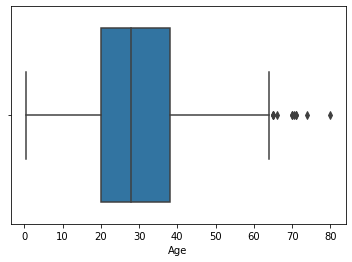

In [114]:
sns.boxplot(df['Age'])

In [115]:
mean_age = df.loc[df['Age'] < upper_tail, 'Age'].mean()

print('Mean before removing outliers ',df['Age'].mean())

df['Age'].loc[df['Age'] > upper_tail] = mean_age

print('Mean after removing outliers',df['Age'].mean())

Mean before removing outliers  29.69911764705882
Mean after removing outliers 29.07207681365576


<AxesSubplot:xlabel='Age'>

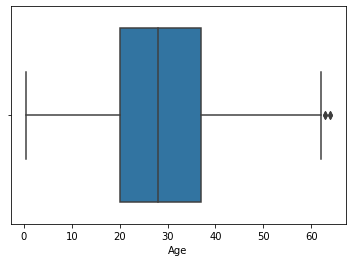

In [118]:
sns.boxplot(df['Age'])

<AxesSubplot:>

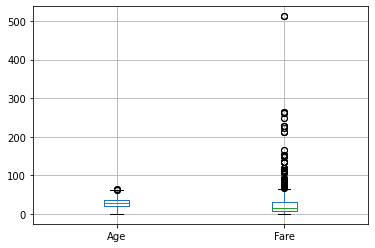

In [120]:
df.boxplot(column=['Age','Fare'])

In [106]:
median_age = df.loc[df['Age'] < upper_tail, 'Age'].median()
df['Age'].loc[df['Age'] > upper_tail] = mean_age
df['Age'].median()

print('Median before removing outliers ',median_age)
print('Median after removing outliers',df['Age'].median())

Median before removing outliers  28.0
Median after removing outliers 28.0


# Transformation

In [ ]:
1. scaling:
    1. Normalization 
    2. Standardization
    
2. Log Transformation

Observation will not deleted


# Normalization 

In [ ]:
Range >> 0 to 1

In [ ]:
Xnorm = (X - Xmin)/(Xmax-Xmin)

In [121]:
df = pd.read_csv('titanic.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.386083,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.487123,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [125]:
age = 25
minimum_age = df['Age'].min() # 0.42
maximum_age = df['Age'].max() # 80

In [127]:
x = 0.42
Age_042 = (x - minimum_age) / (maximum_age - minimum_age)
Age_042

0.0

In [129]:
x = 80
Age_80 = (x - minimum_age) / (maximum_age - minimum_age)
Age_80

1.0

In [130]:
x = 25
Age_25 = (x - minimum_age) / (maximum_age - minimum_age)
Age_25

0.3088715757728072

In [131]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [138]:
normal_scaler = MinMaxScaler()
age_scaled = normal_scaler.fit_transform(df[['Age']])
df['Age'] = pd.DataFrame(age_scaled,columns=['Age'])
df['Age']

0      0.271174
1      0.472229
2      0.321438
3      0.434531
4      0.434531
         ...   
886    0.334004
887    0.233476
888         NaN
889    0.321438
890    0.396833
Name: Age, Length: 891, dtype: float64

In [139]:
std_scaler = StandardScaler()
age_scaled = std_scaler.fit_transform(df[['Age']])
df['Age'] = pd.DataFrame(age_scaled,columns=['Age'])
df['Age']

0     -0.530377
1      0.571831
2     -0.254825
3      0.365167
4      0.365167
         ...   
886   -0.185937
887   -0.737041
888         NaN
889   -0.254825
890    0.158503
Name: Age, Length: 891, dtype: float64

In [141]:
df = pd.read_csv('diabetes.csv')
df_scaled = normal_scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)

In [143]:
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [145]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [146]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [148]:
df = pd.read_csv('diabetes.csv')
df_scaled = std_scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,-0.732120
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,-0.732120
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,-0.732120
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1.365896


# 3. Log Transformation

In [150]:
array1 

array([ 20,  20,  24,  26,  28, 200, 210,  22,  25,  26,  28,  30,  25])

In [153]:
log_transformed_values = np.log(array1)
print('log_transformed_values',log_transformed_values)

log_transformed_values [2.99573227 2.99573227 3.17805383 3.25809654 3.33220451 5.29831737
 5.34710753 3.09104245 3.21887582 3.25809654 3.33220451 3.40119738
 3.21887582]


In [158]:
np.log(df['Age'])

0      3.912023
1      3.433987
2      3.465736
3      3.044522
4      3.496508
         ...   
763    4.143135
764    3.295837
765    3.401197
766    3.850148
767    3.135494
Name: Age, Length: 768, dtype: float64

In [163]:
df = pd.read_csv('diabetes.csv')
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Density'>

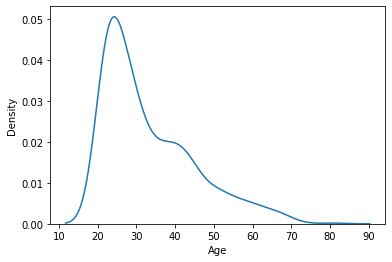

In [161]:
sns.kdeplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

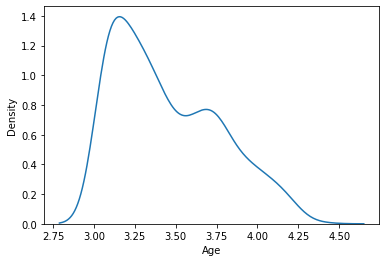

In [175]:
sns.kdeplot(np.log(df['Age']))

<AxesSubplot:xlabel='Age', ylabel='Density'>

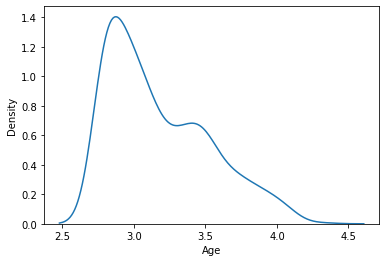

In [177]:
sns.kdeplot(np.cbrt(df['Age']))

<AxesSubplot:xlabel='Age', ylabel='Density'>

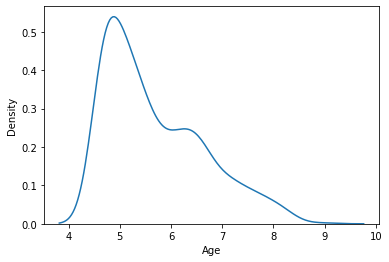

In [178]:
sns.kdeplot(np.sqrt(df['Age']))

# 4. Cuberoot Tranformation

In [167]:
array1

array([ 20,  20,  24,  26,  28, 200, 210,  22,  25,  26,  28,  30,  25])

In [169]:
array1 ** (1/3)

array([2.71441762, 2.71441762, 2.88449914, 2.96249607, 3.03658897,
       5.84803548, 5.94392195, 2.80203933, 2.92401774, 2.96249607,
       3.03658897, 3.10723251, 2.92401774])

In [171]:
np.cbrt(array1)

array([2.71441762, 2.71441762, 2.88449914, 2.96249607, 3.03658897,
       5.84803548, 5.94392195, 2.80203933, 2.92401774, 2.96249607,
       3.03658897, 3.10723251, 2.92401774])

In [174]:
np.cbrt(df['Age'] )

0      3.684031
1      3.141381
2      3.174802
3      2.758924
4      3.207534
         ...   
763    3.979057
764    3.000000
765    3.107233
766    3.608826
767    2.843867
Name: Age, Length: 768, dtype: float64